In [5]:
import sys; import os
!{sys.executable} -m pip install Pillow==6.1

In [1]:
from fastai.vision import *

/opt/conda/lib/python3.6/site-packages/torchvision/io/_video_opt.py:17: UserWarning: video reader based on ffmpeg c++ ops not available
  warnings.warn("video reader based on ffmpeg c++ ops not available")


In [2]:
rootname = 'emotions'
emotions = ('angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral')
genders = ('man', 'woman')

In [3]:
# packs = []
# for e in emotions:
#     for g in genders:
#         cl = '{}_{}'.format(e, g)
#         file = 'urls_{}.csv'.format(cl)
#         path = Path('data')/rootname
#         dest = path/cl
#         dest.mkdir(parents=True, exist_ok=True)
#         packs.append({
#             'folder': cl, 'file': file,
#             'path': path, 'dest': dest, 'class': cl
#         })

In [4]:
# for pack in packs:
#     download_images(pack['path']/pack['file'], pack['dest'], max_pics=200)

In [5]:
# for pack in packs:
#     print(path/pack['class'])
#     verify_images(path/pack['class'], delete=True, max_size=500)

In [26]:
doc(ImageDataBunch)

In [6]:
np.random.seed(42)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
data = ImageDataBunch.from_csv(
    path=Path('data')/rootname, 
    csv_labels='cleaned.csv',
    valid_pct=0.2,
    ds_tfms=get_transforms(), 
    size=224,
    num_workers=4).normalize(imagenet_stats)

In [25]:
data.stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

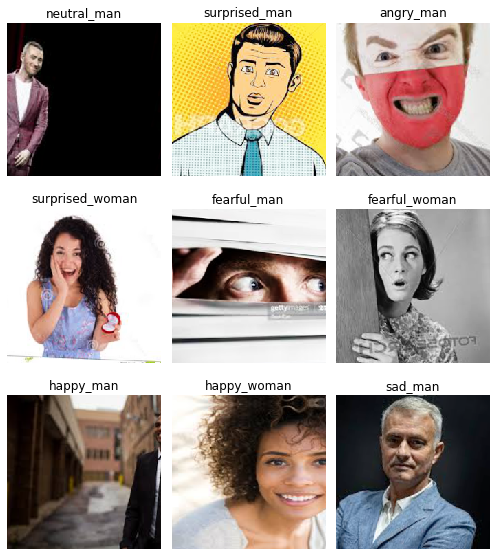

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
print('classes:', len(data.classes))
print('samples in training:', len(data.train_ds))
print('samples in validation:', len(data.valid_ds))

classes: 14
samples in training: 1466
samples in validation: 366


In [63]:
print('classes:', len(data.classes))
print('samples in training:', len(data.train_ds))
print('samples in validation:', len(data.valid_ds))

classes: 14
samples in training: 1466
samples in validation: 366


In [10]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.514575,2.795866,0.713115,00:30
1,2.809684,2.542984,0.729508,00:22
2,2.261752,2.118550,0.633880,00:22
3,1.869274,2.062346,0.617486,00:22


In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


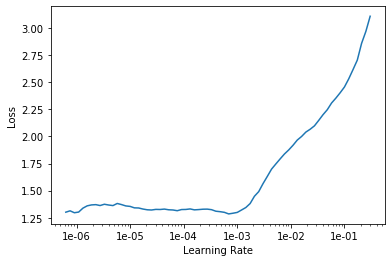

In [15]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.172511,2.175751,0.546448,00:29
1,0.158349,2.200269,0.535519,00:29
2,0.180497,2.552005,0.565574,00:29
3,0.200251,2.773462,0.592896,00:29
4,0.233232,2.821743,0.562842,00:29
5,0.233096,2.682388,0.568306,00:29
6,0.198453,2.479259,0.551913,00:29
7,0.168771,2.430147,0.535519,00:29
8,0.135982,2.420373,0.524590,00:29
9,0.116228,2.423505,0.527322,00:29


In [18]:
learn.save('stage-2')

In [67]:
learn.load('stage-2');

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

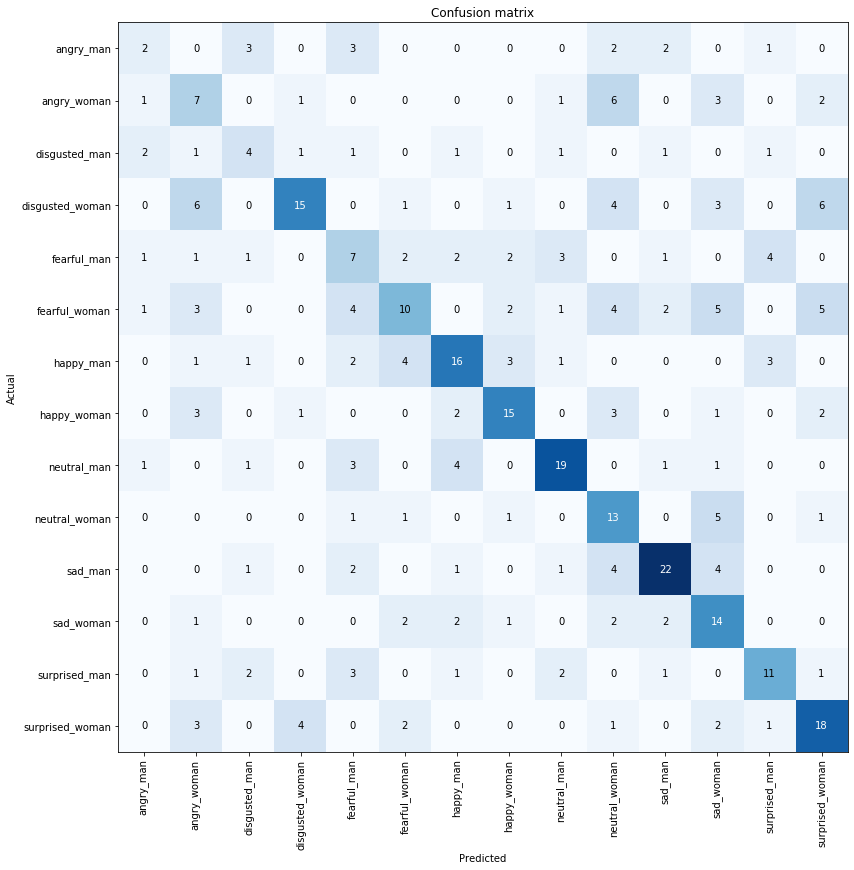

In [20]:
interp.plot_confusion_matrix(figsize=(12,12))

## Clean up dataset

In [51]:
from fastai.widgets import *

In [57]:
db = (data)

In [58]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [59]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [60]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [36]:
doc(ImageCleaner)

In [34]:
print('classes:', len(ds.classes))
print('samples in training:', len(ds.train_ds))
print('samples in validation:', len(ds.valid_ds))

classes: 14


AttributeError: train_ds